**Лабораторная работа 10**

In [ ]:
import random
import numpy
import matplotlib.pyplot as plt

def rand(a, b):
  return random.random() * (b - a) + a

def generate_vector(n, a, b):
  res_s = [0] * n
  for j in range(n):
    res_s[j] = rand(a, b)
  return numpy.array(res_s)

def generate_matrix(n, a, b):
  res = []
  for i in range(n):
    res_s = [0] * n
    for j in range(n):
      res_s[j] = rand(a, b)
    res.append(res_s)
  return numpy.array(res)

print(generate_matrix(5, 0, 2))
print(generate_vector(5, 0, 2))

[[0.18396486 0.22068139 0.75231863 0.77959356 1.33232128]
 [0.99255124 1.53121849 0.75985468 1.7426462  0.18412907]
 [1.10006531 1.81033491 1.75050544 1.2965656  1.78929583]
 [0.0745518  0.90367671 1.72561579 0.95188216 0.97619736]
 [0.0293845  1.1282956  1.87010883 1.49649552 0.16834246]]
[1.75581545 0.43349435 0.95424703 1.27753804 1.70094081]


In [ ]:
N = 5
A = generate_matrix(N, -10, 10)
b = generate_vector(N, -5, 5)

def get_split(A):
  n = len(A)
  L = numpy.eye(n)
  U = numpy.zeros((n, n))
  
  for i in range(n):
    for j in range(n):
      if i <= j:
        sum = 0.0
        for k in range(i):
          sum += L[i][k] * U[k][j]
        U[i][j] = A[i][j] - sum

      else:
        sum = 0.0
        for k in range(j):
          sum += L[i][k] * U[k][j]
        L[i][j] = 1 / U[j][j] * (A[i][j] - sum)

  return numpy.array(L), numpy.array(U)


L, U = get_split(A)
print('A-matrix: \n{}\n\nL-matrix: \n{}\n\n U-matrix: \n{}\n\n'.format(A, L, U))
res = A - numpy.matmul(L, U)
print('A - LU: \n{}\n\n'.format(res))
print('A - LU norm: \n{}\n\n'.format(numpy.linalg.norm(res)))



A-matrix: 
[[-9.88193779 -1.3029432   3.01371334  8.57482082  0.82039693]
 [-5.25150178 -1.23865176  3.65384458 -9.15046575  8.13711305]
 [ 1.99034719 -3.06881569  0.23232666  2.70336042  6.24193767]
 [-4.36687112  7.42655738  8.66094839  3.98724878  1.85754328]
 [-7.08346514  0.69992053  7.66187388  2.65523274  4.39501397]]

L-matrix: 
[[  1.           0.           0.           0.           0.        ]
 [  0.53142429   1.           0.           0.           0.        ]
 [ -0.20141264   6.09854413   1.           0.           0.        ]
 [  0.44190433 -14.64995396  -3.20255757   1.           0.        ]
 [  0.71680932  -2.99116513  -0.99689278   0.53214975   1.        ]]

 U-matrix: 
[[ -9.88193779  -1.3029432    3.01371334   8.57482082   0.82039693]
 [  0.          -0.54623609   2.0522841  -13.70733382   7.7011342 ]
 [  0.           0.         -11.67661853  88.02521787 -40.55853074]
 [  0.           0.           0.          81.29201645 -15.57476173]
 [  0.           0.           0.   

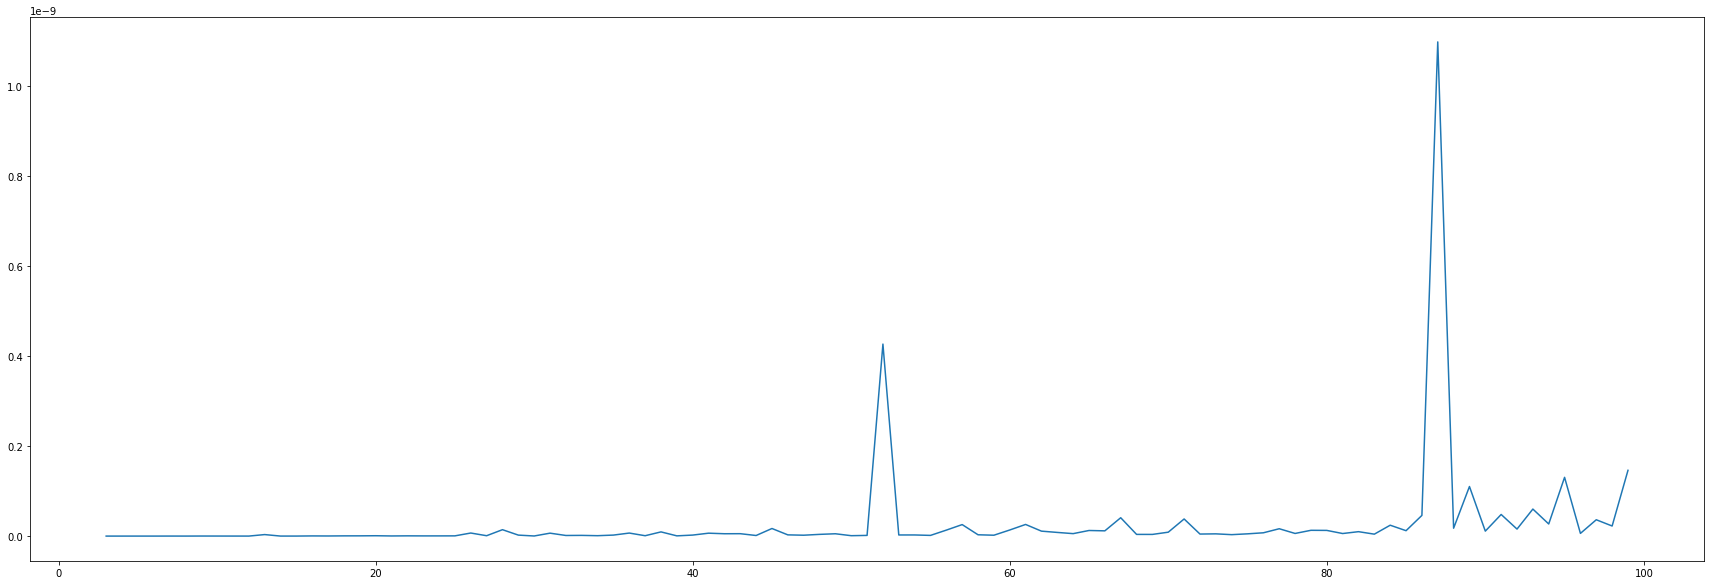

In [ ]:
def main():
  x = []
  y = []
  for i in range(3, 100):
    x.append(i)
    A = generate_matrix(i, -10, 10)
    L, U = get_split(A)
    y.append(numpy.linalg.norm(A - numpy.matmul(L, U)))

  plt.figure(figsize=(30, 10))
  plt.plot(x, y)

main()